In [1]:
import xarray as xr
import numpy as np
import glob
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from xarray import DataArray
import pandas as pd
# from PyEMD import EEMD
import pylab as plt
from numpy import diff
from sklearn import preprocessing

In [17]:
trans_fsc = np.load("/work/uo1075/u241321/data/eemd_htransport310_wt.npy")
trans_ifc = np.load("/work/uo1075/u241321/data/eemd_htransport310_ifc_wt.npy")

transport = trans_fsc[2,:] + trans_ifc[2,:]+ trans_fsc[3,:] + trans_ifc[3,:]

tend = np.load("/work/uo1075/u241321/data/eemd_tend_Norwegian_wt.npy")
slheat = np.load("/work/uo1075/u241321/data/eemd_slheat_Norwegian_wt.npy")

tendency = tend[2,:] +tend[3,:] 
slheat = slheat[2,:] +slheat[3,:] 

# transport = preprocessing.scale(transport)
# slheat= preprocessing.scale(slheat)
# tendency= preprocessing.scale(tendency)


In [4]:
np.corrcoef(transport[0:49], tend)[0,1]

0.10202117429924275

In [5]:
np.corrcoef(slheat[0:49], tend)[0,1]

0.10719791522800104

In [26]:
transport

array([-0.01608534,  0.00784754,  0.02441577,  0.02257918,  0.01407839,
        0.01161401,  0.00742385,  0.00305427,  0.00139584, -0.00425029,
       -0.00927515, -0.00447011,  0.00250118,  0.00069327, -0.00555144,
       -0.00939897, -0.00796201, -0.00033673,  0.00656444,  0.005208  ,
       -0.00115335, -0.00128667,  0.00061126, -0.00279857, -0.00410407,
       -0.00068598,  0.00416392,  0.0051787 ,  0.00276677, -0.00464855,
       -0.01355288, -0.01021093,  0.0060843 ,  0.0171481 ,  0.01185654,
        0.00172969,  0.00012843,  0.00460418,  0.00571018,  0.00019469,
       -0.00804653, -0.01209945, -0.00993453, -0.00761596, -0.00680677,
        0.00043087,  0.01169492,  0.01636066,  0.01250131,  0.00678137])

/tmp/ipykernel_2483063/1157699850.py:5: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(x, tendency, '-', linestyle='solid', color='black', linewidth=5, markersize=10, label = 'Tendency of OHC')
/tmp/ipykernel_2483063/1157699850.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(x, slheat[0:49], '-', linestyle='solid', color='red', linewidth=5, markersize=10, label = 'Turbulent Heat flux')
/tmp/ipykernel_2483063/1157699850.py:16: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax1.plot(x, transport[0:49], '-', linestyle='solid', color='blue', linewidth=5, markersize=10, label = 'Temperature transport')


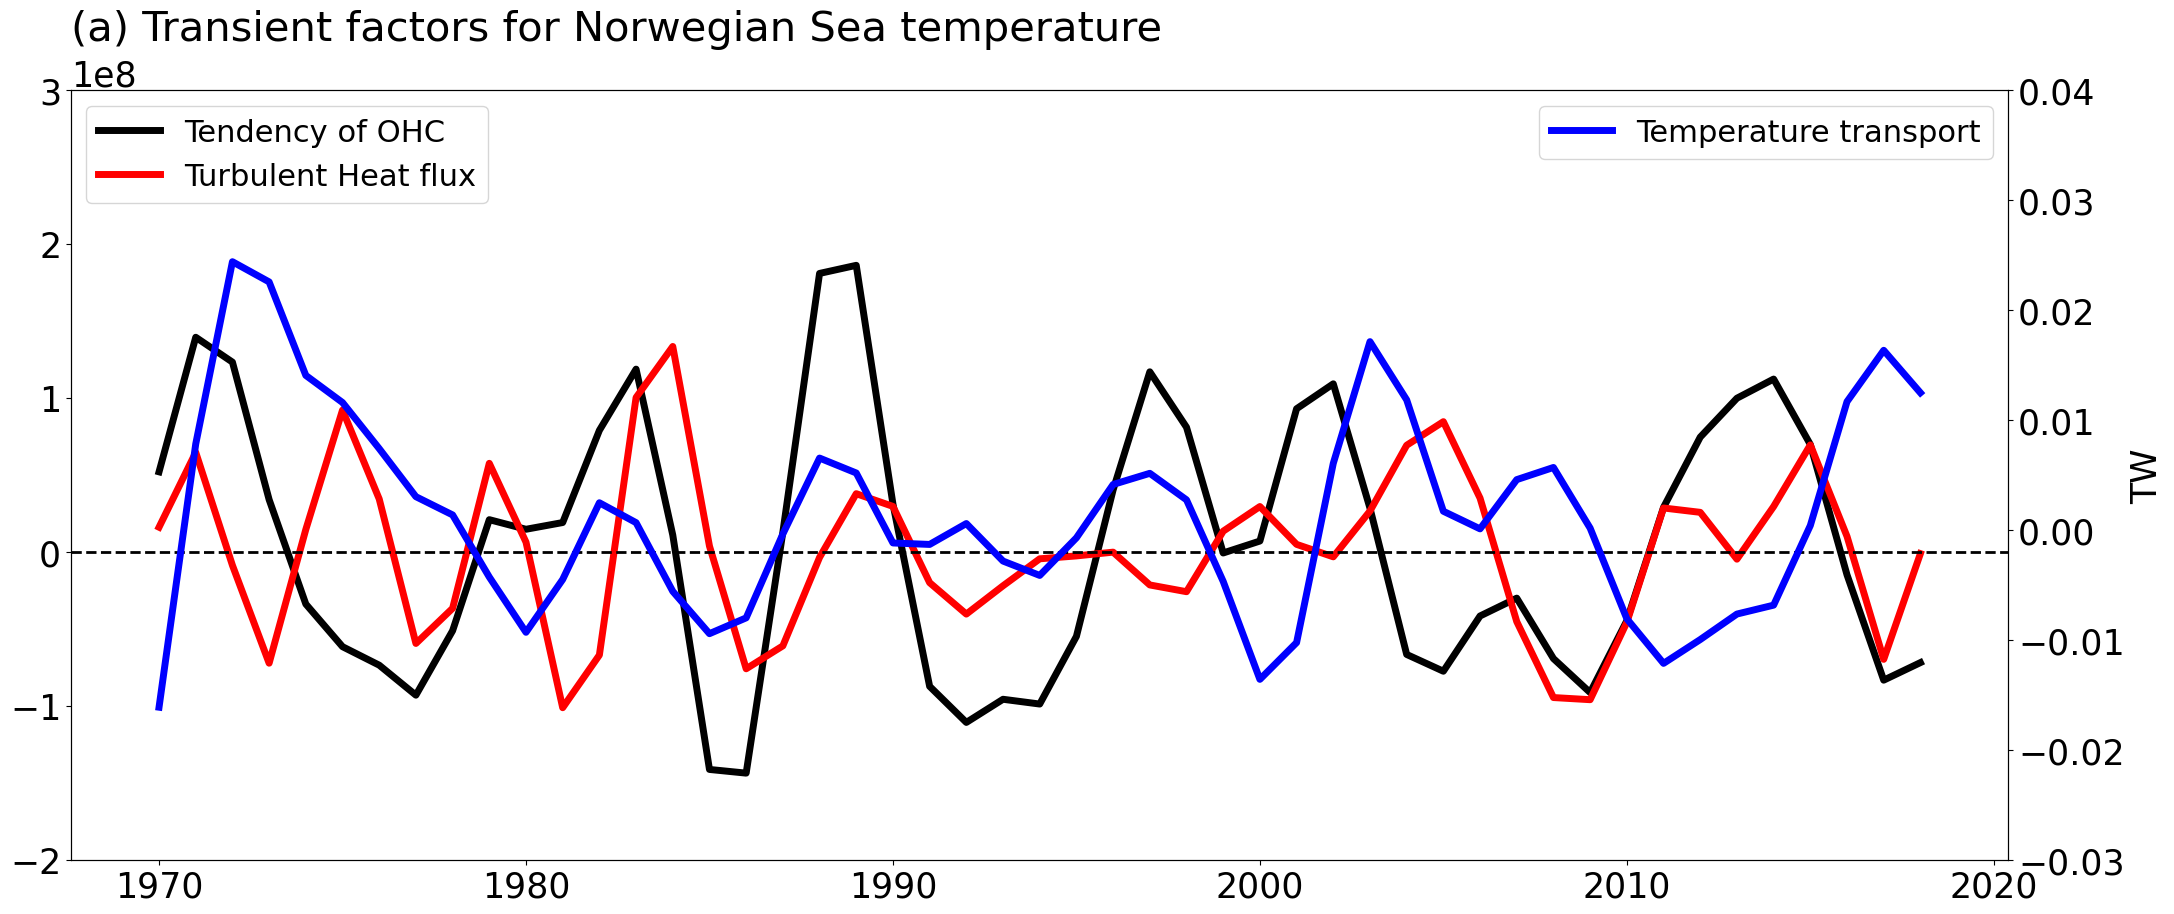

In [27]:

# y = [-3, -2, -1, 0, 3]
x = np.arange(1970,2019,1)  # starting from difference between 1971 and 1970

fig, ax = plt.subplots(figsize = [25,10])
ax.plot(x, tendency, '-', linestyle='solid', color='black', linewidth=5, markersize=10, label = 'Tendency of OHC')
ax.plot(x, slheat[0:49], '-', linestyle='solid', color='red', linewidth=5, markersize=10, label = 'Turbulent Heat flux')
# ax.plot(x, transport[0:49], '-', linestyle='solid', color='blue', linewidth=5, markersize=10, label = 'Heat transport')
ax.set(xlabel='', ylabel='',
       title=' ')
ax.set_ylim(-2e+08, 3e+08)  
ax.set_title('(a) Transient factors for Norwegian Sea temperature ',size = '30', loc = 'left', pad = 36)
ax.legend(loc='upper left', fontsize='22')
ax.axhline(0, linewidth=2, color='black', linestyle= 'dashed')

ax1 = ax.twinx()  # instantiate a second axes that shares the same x-axis
ax1.plot(x, transport[0:49], '-', linestyle='solid', color='blue', linewidth=5, markersize=10, label = 'Temperature transport')
ax1.set_ylim(-0.03, 0.04) 
ax1.legend(loc='upper right', fontsize='22')
ax1.set(xlabel='', ylabel='TW',
       title=' ')


plt.rcParams["font.size"] = "25"
plt.show()
# fig.savefig('/work/uo1075/u241321/results/heat_transport.pdf')


In [8]:
# compare with previous ones
trans_fsc = np.load("/work/uo1075/u241321/data/eemd_htransport310.npy")
trans_ifc = np.load("/work/uo1075/u241321/data/eemd_htransport310_ifc.npy")

transport1 = trans_fsc[2,:] + trans_ifc[2,:]+ trans_fsc[3,:] + trans_ifc[3,:]+ trans_fsc[4,:] + trans_ifc[4,:] 

tend = np.load("/work/uo1075/u241321/data/eemd_tend_Norwegian.npy")
slheat = np.load("/work/uo1075/u241321/data/eemd_slheat_Norwegian.npy")

tendency1 = tend[2,:] +tend[3,:] + tend[4,:]
slheat1 = slheat[2,:] +slheat[3,:] + slheat[4,:]

In [10]:
np.corrcoef(transport[0:49], transport1[0:49])[0,1]

0.6211055419861544

In [11]:
np.corrcoef(tendency[0:49], tendency1[0:49])[0,1]

0.9628339737864329

In [12]:
np.corrcoef(slheat[0:49], slheat1[0:49])[0,1]

0.8956634767882159